In [ ]:
#!pip install plotly

In [40]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Data Exploration and Pre-Processing for BC

In [2]:
df = pd.read_excel('WonderfulWinesoftheWorld.xlsx', index_col=0)

In [3]:
df.index.isna().sum()


1

In [4]:
df

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,653.000,55.0000,20.0000,78473.000,20.0000,18.0000,826.0000,445.0000,7.0000,67.0000,4.0000,26.0000,2.0000,1.0000,1.0000,36.0000,5.0000
3956.0,1041.000,75.0000,18.0000,105087.000,36.0000,33.0000,1852.0000,539.0000,2.0000,49.0000,0.0000,46.0000,1.0000,3.0000,0.0000,20.0000,4.0000
3681.0,666.000,18.0000,12.0000,27984.000,4.0000,56.0000,39.0000,-7.0000,88.0000,4.0000,29.0000,14.0000,32.0000,21.0000,48.0000,60.0000,8.0000
2829.0,1049.000,42.0000,16.0000,61748.000,2.0000,46.0000,37.0000,-6.0000,70.0000,86.0000,1.0000,11.0000,1.0000,1.0000,55.0000,59.0000,7.0000
8788.0,837.000,47.0000,16.0000,65789.000,2.0000,3.0000,36.0000,4.0000,35.0000,85.0000,0.0000,12.0000,2.0000,1.0000,28.0000,63.0000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070.0,596.000,66.0000,15.0000,84714.000,18.0000,45.0000,720.0000,391.0000,5.0000,30.0000,12.0000,36.0000,10.0000,12.0000,13.0000,18.0000,2.0000
7909.0,619.000,18.0000,12.0000,40466.000,3.0000,65.0000,47.0000,5.0000,23.0000,6.0000,24.0000,10.0000,38.0000,22.0000,41.0000,58.0000,5.0000
4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,368.0000,15.0000,2.0000,35.0000,18.0000,13.0000,45.0000,11.0000,13.0000,13.0000,60.0000,6.0000


In [5]:
df.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,653.0,55.0,20.0,78473.0,20.0,18.0,826.0,445.0,7.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,5.0
3956.0,1041.0,75.0,18.0,105087.0,36.0,33.0,1852.0,539.0,2.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,4.0
3681.0,666.0,18.0,12.0,27984.0,4.0,56.0,39.0,-7.0,88.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,8.0
2829.0,1049.0,42.0,16.0,61748.0,2.0,46.0,37.0,-6.0,70.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,7.0
8788.0,837.0,47.0,16.0,65789.0,2.0,3.0,36.0,4.0,35.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,6.0


#### Missing Values 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10001 entries, 5325.0 to nan
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dayswus      10001 non-null  float64
 1   Age          10001 non-null  float64
 2   Edu          10001 non-null  float64
 3   Income       10001 non-null  float64
 4   Freq         10001 non-null  float64
 5   Recency      10001 non-null  float64
 6   Monetary     10001 non-null  float64
 7   LTV          10001 non-null  float64
 8   Perdeal      10001 non-null  float64
 9   Dryred       10001 non-null  float64
 10  Sweetred     10001 non-null  float64
 11  Drywh        10001 non-null  float64
 12  Sweetwh      10001 non-null  float64
 13  Dessert      10001 non-null  float64
 14  Exotic       10001 non-null  float64
 15  WebPurchase  10001 non-null  float64
 16  WebVisit     10001 non-null  float64
dtypes: float64(17)
memory usage: 1.4 MB


No Missing Values 

#### Outliers

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dayswus,10001.0,898.1020,202.482664,550.0,724.0,894.0,1074.0,1250.0
Age,10001.0,47.9273,17.301856,18.0,33.0,48.0,63.0,78.0
Edu,10001.0,16.7391,1.876281,12.0,15.0,17.0,18.0,20.0
Income,10001.0,69904.3580,27610.852665,10000.0,47646.0,70009.0,92147.0,140628.0
Freq,10001.0,14.6281,11.968475,1.0,4.0,12.0,24.0,56.0
Recency,10001.0,62.4068,69.870762,0.0,26.0,52.0,78.0,549.0
Monetary,10001.0,622.5552,647.102966,6.0,63.0,383.0,1077.0,3052.0
LTV,10001.0,209.0712,291.971441,-178.0,-2.0,57.0,364.0,1791.0
Perdeal,10001.0,32.3972,27.895699,0.0,6.0,25.0,56.0,97.0
Dryred,10001.0,50.3827,23.452643,1.0,32.0,51.0,69.0,99.0


In [8]:
features = ['Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
        'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
        'Exotic', 'WebPurchase', 'WebVisit']

In [9]:
features

['Age',
 'Edu',
 'Income',
 'Freq',
 'Recency',
 'Monetary',
 'LTV',
 'Perdeal',
 'Dryred',
 'Sweetred',
 'Drywh',
 'Sweetwh',
 'Dessert',
 'Exotic',
 'WebPurchase',
 'WebVisit']

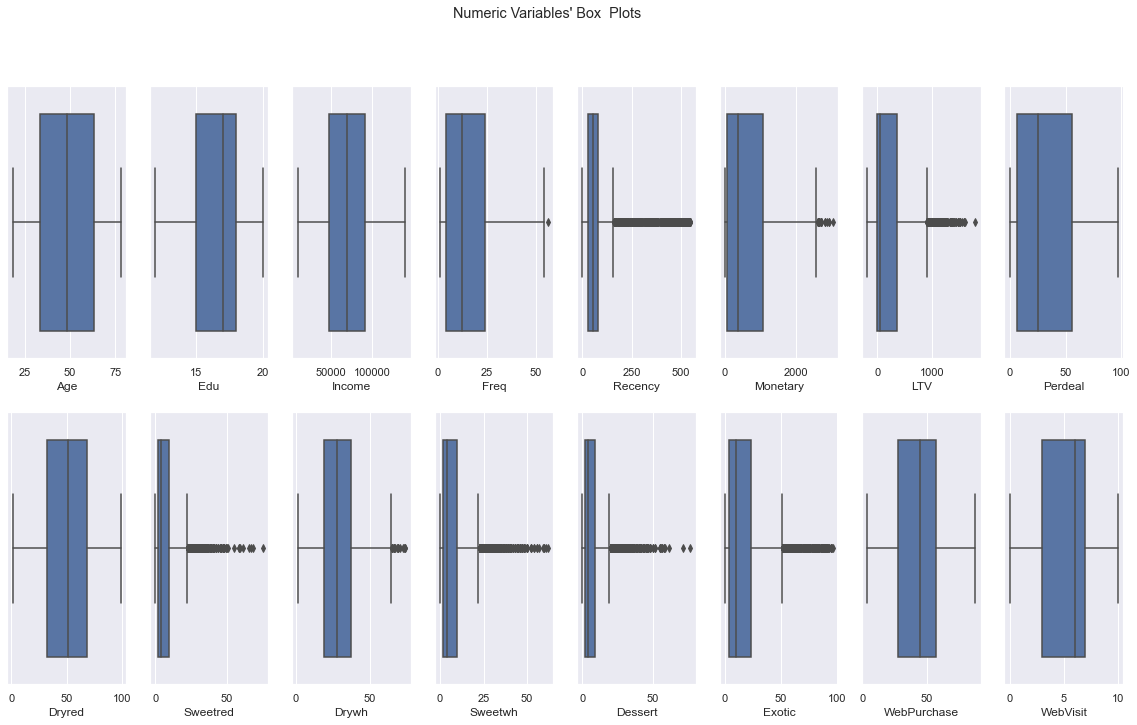

In [10]:
# All Numeric Variables' Box Plots in one figure
sns.set()


# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), features): 
    sns.boxplot(x=df[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box  Plots"

plt.suptitle(title)

plt.show()

# Customer segmentation

In [11]:
Customer_features = ['Age','Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal',
                    'WebVisit','WebPurchase']

In [12]:
df_customer = df[Customer_features]

In [13]:
Mon_by_freq = df_customer['Monetary'] / df_customer['Freq']
Mon_by_freq

Custid
5325.0    41.300000
3956.0    51.444444
3681.0     9.750000
2829.0    18.500000
8788.0    18.000000
            ...    
4070.0    40.000000
7909.0    15.666667
4158.0    15.000000
4914.0    45.920000
NaN       42.558856
Length: 10001, dtype: float64

### Average amount of sales by a single purchase

In [14]:
df_customer['Value_per_Purchase'] = Mon_by_freq

/var/folders/x8/rchg54g91cl4k7n26xkn8mq80000gn/T/ipykernel_23968/391831537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['Mon_by_Purchase'] = Mon_by_freq


In [15]:
df_customer

,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,WebVisit,WebPurchase,Mon_by_Purchase
Custid,,,,,,,,,,,
5325.0,55.0000,20.0000,78473.000,20.0000,18.0000,826.0000,445.0000,7.0000,5.0000,36.0000,41.300000
3956.0,75.0000,18.0000,105087.000,36.0000,33.0000,1852.0000,539.0000,2.0000,4.0000,20.0000,51.444444
3681.0,18.0000,12.0000,27984.000,4.0000,56.0000,39.0000,-7.0000,88.0000,8.0000,60.0000,9.750000
2829.0,42.0000,16.0000,61748.000,2.0000,46.0000,37.0000,-6.0000,70.0000,7.0000,59.0000,18.500000
8788.0,47.0000,16.0000,65789.000,2.0000,3.0000,36.0000,4.0000,35.0000,6.0000,63.0000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...
4070.0,66.0000,15.0000,84714.000,18.0000,45.0000,720.0000,391.0000,5.0000,2.0000,18.0000,40.000000
7909.0,18.0000,12.0000,40466.000,3.0000,65.0000,47.0000,5.0000,23.0000,5.0000,58.0000,15.666667
4158.0,33.0000,16.0000,53661.000,1.0000,368.0000,15.0000,2.0000,35.0000,6.0000,60.0000,15.000000


## Scalling

In [16]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_customer)
df_customer_ST = pd.DataFrame(scaled_feat, index= df_customer.index, columns= df_customer.columns)
df_customer_ST

,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,WebVisit,WebPurchase,Mon_by_Purchase
Custid,,,,,,,,,,,
5325.0,4.088032e-01,1.738046,3.103515e-01,0.448860,-0.635588,0.314409,0.808095,-0.910480,-0.092952,-0.344283,0.682462
3956.0,1.564806e+00,0.672054,1.274296e+00,1.785772,-0.420895,1.900016,1.130060,-1.089728,-0.522096,-1.208204,1.422387
3681.0,-1.729803e+00,-2.525920,-1.518332e+00,-0.888052,-0.091700,-0.901842,-0.740079,1.993339,1.194478,0.951598,-1.618762
2829.0,-3.425989e-01,-0.393937,-2.954188e-01,-1.055166,-0.234828,-0.904932,-0.736654,1.348046,0.765334,0.897603,-0.980547
8788.0,-5.359809e-02,-0.393937,-1.490560e-01,-1.055166,-0.850281,-0.906478,-0.702402,0.093309,0.336191,1.113583,-1.017016
...,...,...,...,...,...,...,...,...,...,...,...
4070.0,1.044605e+00,-0.926933,5.363971e-01,0.281746,-0.249141,0.150594,0.623136,-0.982179,-1.380383,-1.316195,0.587641
7909.0,-1.729803e+00,-2.525920,-1.066241e+00,-0.971609,0.037116,-0.889478,-0.698977,-0.336886,-0.092952,0.843608,-1.187207
4158.0,-8.628003e-01,-0.393937,-5.883256e-01,-1.138723,4.373911,-0.938932,-0.709253,0.093309,0.336191,0.951598,-1.235833


# Feature Selection

In [17]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

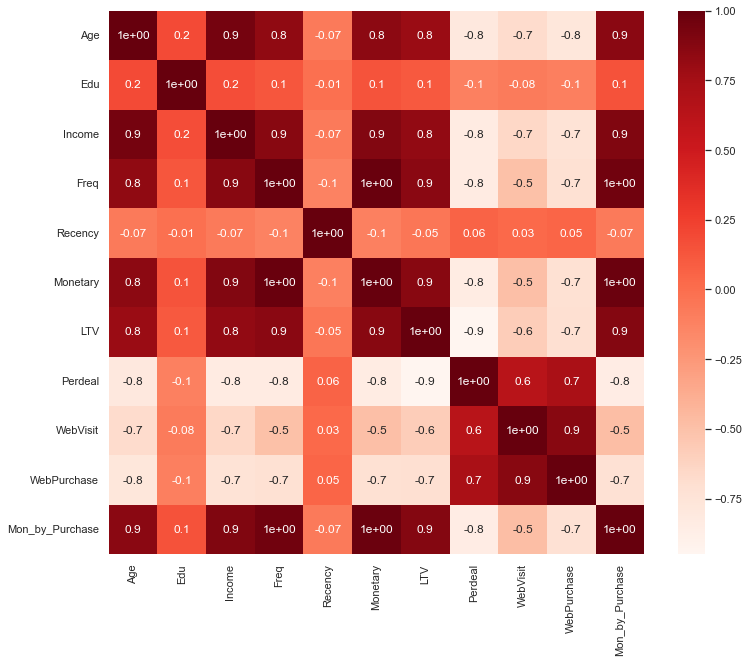

In [18]:
# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_customer_ST.corr(method="spearman"), decimals=2)


cor_heatmap(corr)

# Clustering

## Hierarchical Clustering

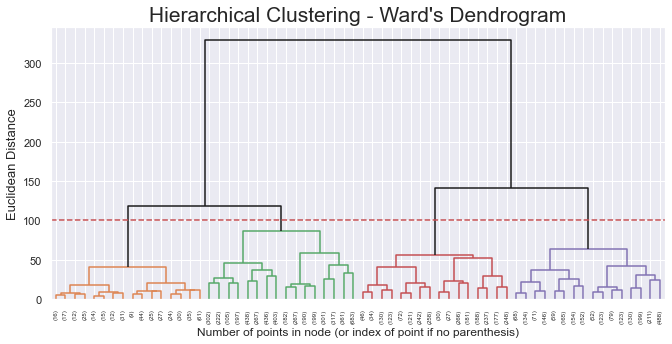

In [19]:
linkage = 'ward' 
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_customer_ST)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [20]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
df_customer_labels_HC = hc4lust.fit_predict(df_customer_ST)

In [21]:
df_customer_ST['labels_HC'] = df_customer_labels_HC

In [22]:
Cluster_count = pd.DataFrame(df_customer_ST.groupby('labels_HC').count()['Age'])
Cluster_count.rename(columns={"Age":"Count"},inplace = True)
Cluster_count

,Count
labels_HC,
0,4870
1,2354
2,2380
3,397


## K-means + Hierarchical Clustering

In [23]:
kmclust = KMeans(n_clusters=50, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_customer_ST)
# create new dataframe: scaled data + labels
df_customer_ST = pd.concat([df_customer_ST.reset_index(), pd.Series(km_labels, name='labels_KM')], axis=1).set_index('Custid')
# group by labels to use in hierarchical
df_customer_labels = df_customer_ST.groupby('labels_KM').mean()


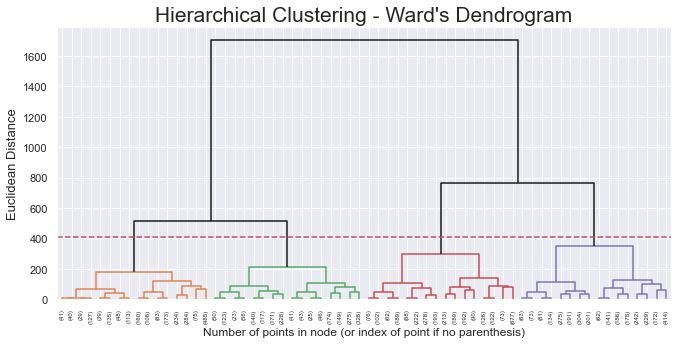

In [24]:
linkage = 'ward' 
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_customer_ST)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 410
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [25]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
df_customer_labels_HC_KM = hc4lust.fit_predict(df_customer_ST)

In [26]:
df_customer_labels_HC_KM =pd.DataFrame(df_customer_labels_HC_KM, index=df_customer_ST.index)

In [27]:
df_customer_labels_HC_KM

,0
Custid,
5325.0,2
3956.0,0
3681.0,0
2829.0,2
8788.0,2
...,...
4070.0,0
7909.0,0
4158.0,1


In [28]:
df_customer_ST['labels_HC_KM'] = df_customer_labels_HC_KM

In [29]:
df_customer_ST

,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,WebVisit,WebPurchase,Mon_by_Purchase,labels_HC,labels_KM,labels_HC_KM
Custid,,,,,,,,,,,,,,
5325.0,4.088032e-01,1.738046,3.103515e-01,0.448860,-0.635588,0.314409,0.808095,-0.910480,-0.092952,-0.344283,0.682462,1,8,2
3956.0,1.564806e+00,0.672054,1.274296e+00,1.785772,-0.420895,1.900016,1.130060,-1.089728,-0.522096,-1.208204,1.422387,2,16,0
3681.0,-1.729803e+00,-2.525920,-1.518332e+00,-0.888052,-0.091700,-0.901842,-0.740079,1.993339,1.194478,0.951598,-1.618762,0,25,0
2829.0,-3.425989e-01,-0.393937,-2.954188e-01,-1.055166,-0.234828,-0.904932,-0.736654,1.348046,0.765334,0.897603,-0.980547,0,2,2
8788.0,-5.359809e-02,-0.393937,-1.490560e-01,-1.055166,-0.850281,-0.906478,-0.702402,0.093309,0.336191,1.113583,-1.017016,0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070.0,1.044605e+00,-0.926933,5.363971e-01,0.281746,-0.249141,0.150594,0.623136,-0.982179,-1.380383,-1.316195,0.587641,1,23,0
7909.0,-1.729803e+00,-2.525920,-1.066241e+00,-0.971609,0.037116,-0.889478,-0.698977,-0.336886,-0.092952,0.843608,-1.187207,0,21,0
4158.0,-8.628003e-01,-0.393937,-5.883256e-01,-1.138723,4.373911,-0.938932,-0.709253,0.093309,0.336191,0.951598,-1.235833,3,37,1


In [30]:
Cluster_count = pd.DataFrame(df_customer_ST.groupby('labels_HC_KM').count()['Age'])
Cluster_count.rename(columns={"Age":"Count"},inplace = True)
Cluster_count

,Count
labels_HC_KM,
0,2946
1,1989
2,2892
3,2174


# Cluster profiling

In [51]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

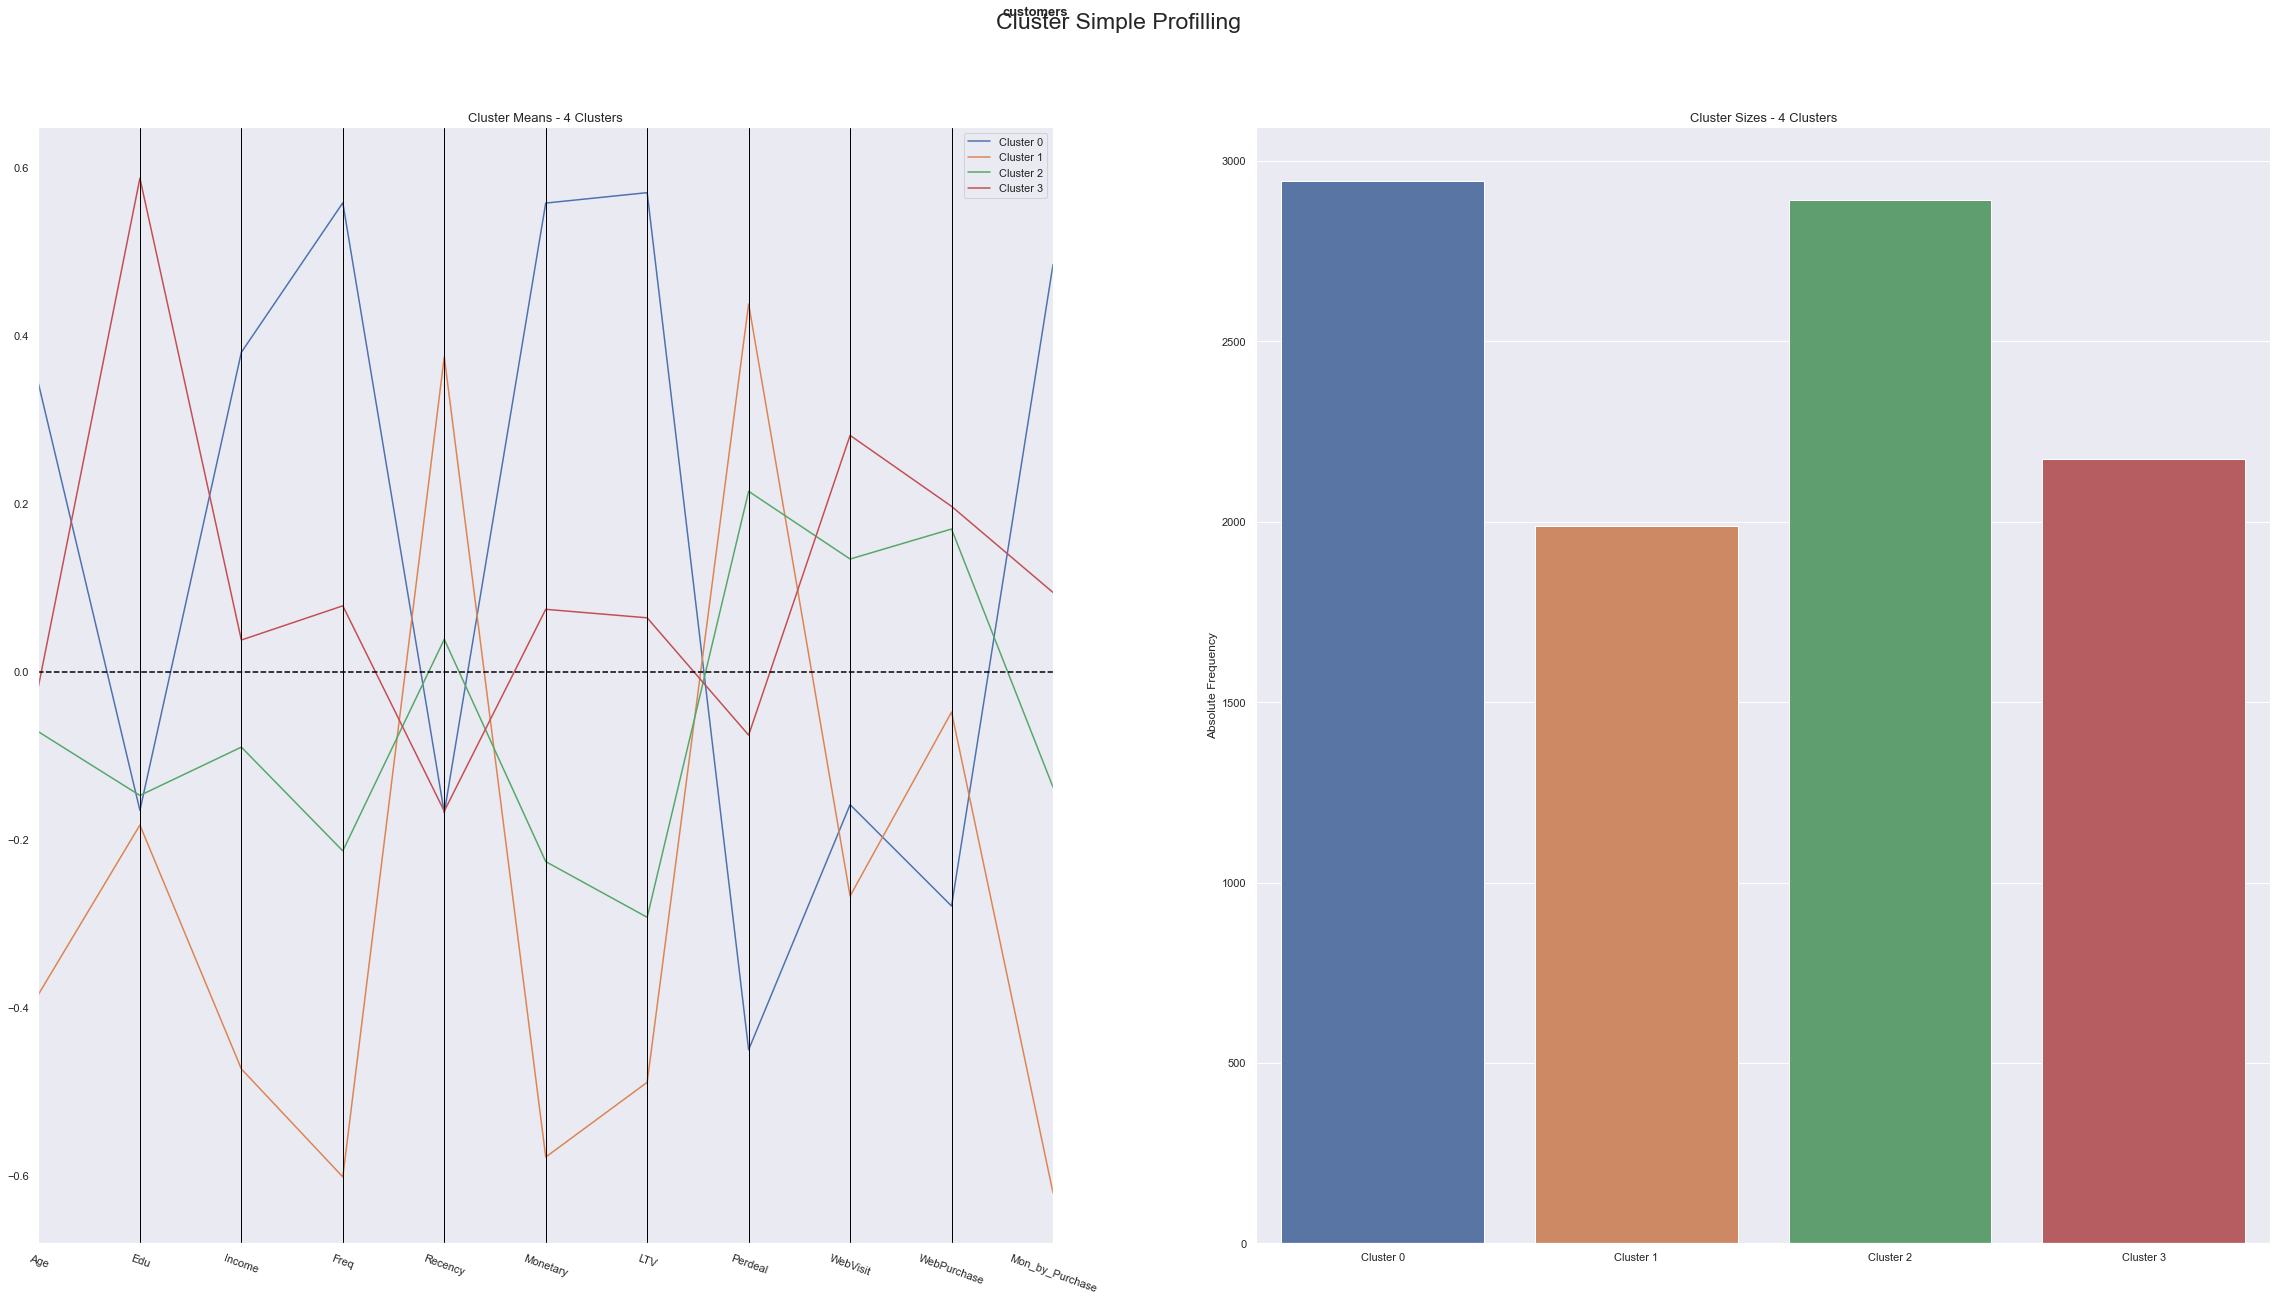

In [52]:
cluster_profiles(
    df = df_customer_ST[Customer_features + ['Mon_by_Purchase' , 'labels_HC_KM']], 
    label_columns = ['labels_HC_KM'], 
    figsize = (40, 20), 
    compar_titles = ["customers"]
)